# CIFAR-10 Multiple Classes
------
------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# datasets
from tensorflow.keras.datasets import cifar10

(x_train, y_train),(x_test, y_test) = cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

## Visual Image 

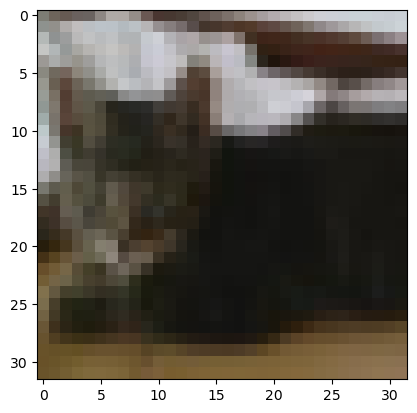

In [7]:
plt.imshow(x_train[9])

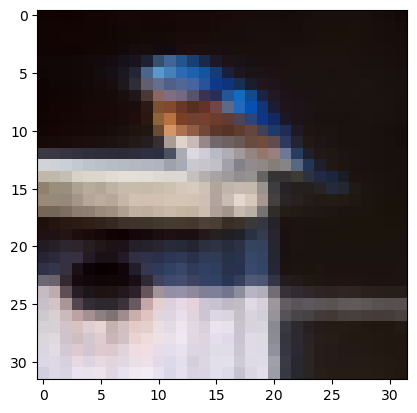

In [8]:
plt.imshow(x_train[13])

## Preprocessing data Y

In [10]:
y_train.shape

(50000, 1)

In [11]:
y_test.shape

(10000, 1)

In [12]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_sample = to_categorical(y_train)

In [16]:
y_sample.shape

(50000, 10)

In [17]:
y_cat_train = to_categorical(y_train, num_classes = 10)

In [18]:
y_cat_test = to_categorical(y_test, num_classes = 10)

## Prerprocessing data X

In [20]:
x_train.shape

(50000, 32, 32, 3)

In [21]:
x_test.shape

(10000, 32, 32, 3)

In [22]:
x_train[0].max()

255

In [23]:
x_train = x_train/255

In [24]:
x_test = x_test/255

In [25]:
x_train.shape

(50000, 32, 32, 3)

In [26]:
x_train.ndim

4

## Create Model

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size= (4,4), input_shape =(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters =32, kernel_size =(4,4), input_shape =(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 256)              

In [33]:
# earlystopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

## Train the Model

In [34]:
model.fit(x_train, y_cat_train, 
          epochs =10, 
          validation_data = (x_test, y_cat_test), 
          callbacks =[early_stop])

Epoch 1/10
1563/1563 [==============================] - 117s 61ms/step - loss: 1.5598 - accuracy: 0.4395 - val_loss: 1.3392 - val_accuracy: 0.5169
Epoch 2/10
1563/1563 [==============================] - 97s 62ms/step - loss: 1.1926 - accuracy: 0.5786 - val_loss: 1.1749 - val_accuracy: 0.5963
Epoch 3/10
1563/1563 [==============================] - 100s 64ms/step - loss: 1.0323 - accuracy: 0.6391 - val_loss: 1.0565 - val_accuracy: 0.6329
Epoch 4/10
1563/1563 [==============================] - 102s 65ms/step - loss: 0.9191 - accuracy: 0.6821 - val_loss: 1.0150 - val_accuracy: 0.6561
Epoch 5/10
1563/1563 [==============================] - 108s 69ms/step - loss: 0.8284 - accuracy: 0.7150 - val_loss: 1.0870 - val_accuracy: 0.6360
Epoch 6/10
1563/1563 [==============================] - 105s 67ms/step - loss: 0.7641 - accuracy: 0.7379 - val_loss: 0.9841 - val_accuracy: 0.6726
Epoch 7/10
1563/1563 [==============================] - 104s 66ms/step - loss: 0.6937 - accuracy: 0.7615 - val_loss: 1.

In [35]:
losses = pd.DataFrame(model.history.history)

In [36]:
losses

,loss,accuracy,val_loss,val_accuracy
0,1.559822,0.43954,1.339209,0.5169
1,1.192607,0.57862,1.174869,0.5963
2,1.032323,0.63914,1.056513,0.6329
3,0.919126,0.68208,1.015010,0.6561
4,0.828352,0.71496,1.087000,0.6360
5,0.764087,0.73788,0.984069,0.6726
6,0.693684,0.76152,1.017858,0.6772
7,0.648292,0.78088,1.022126,0.6794


In [37]:
plt.style.use(['science','notebook','grid'])

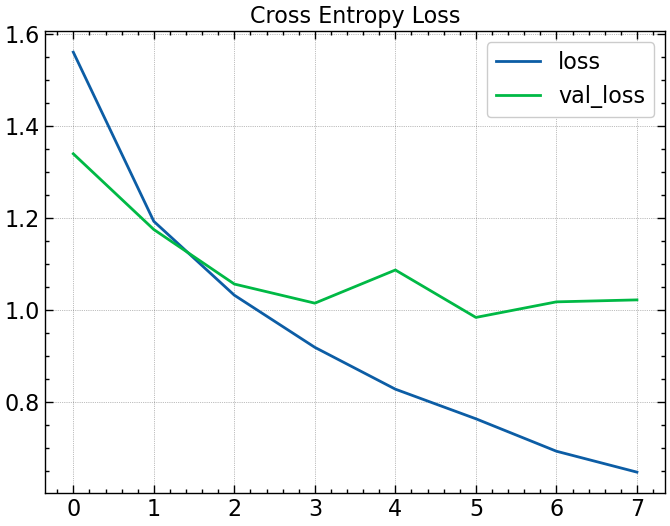

In [38]:
losses[['loss','val_loss']].plot()
plt.title('Cross Entropy Loss');

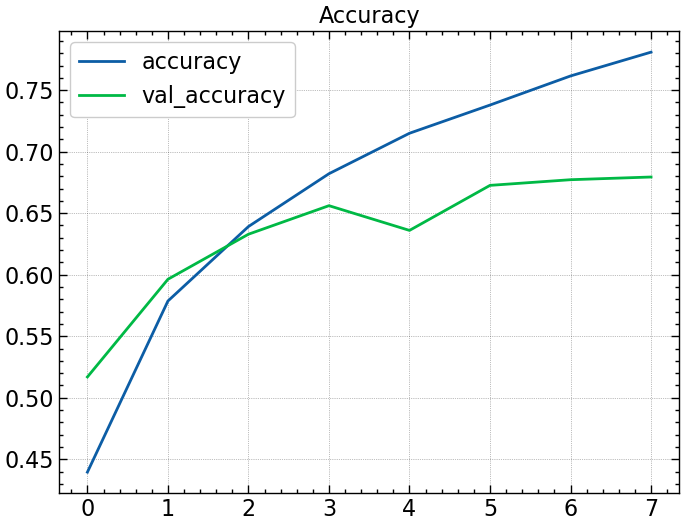

In [39]:
losses[['accuracy','val_accuracy']].plot()
plt.title('Accuracy');

In [40]:
print(model.metrics_names)
print(model.evaluate(x_test, y_cat_test))

['loss', 'accuracy']
313/313 [==============================] - 5s 16ms/step - loss: 1.0221 - accuracy: 0.6794
[1.0221264362335205, 0.6794000267982483]


## Evaluation Model

In [41]:
prediction = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 6s 15ms/step


In [42]:
y_cat_test.shape

(10000, 10)

In [43]:
y_cat_test[13]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [45]:
prediction[13]

7

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72      1000
           1       0.80      0.78      0.79      1000
           2       0.60      0.57      0.59      1000
           3       0.48      0.54      0.50      1000
           4       0.63      0.66      0.65      1000
           5       0.78      0.39      0.52      1000
           6       0.62      0.86      0.72      1000
           7       0.78      0.70      0.74      1000
           8       0.75      0.81      0.78      1000
           9       0.81      0.70      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [50]:
confusion_matrix(y_test, prediction)

array([[782,  19,  42,  12,  22,   2,  18,   5,  74,  24],
       [ 30, 781,   7,  15,   8,   3,  25,   3,  53,  75],
       [ 72,  13, 574,  82,  80,  20, 107,  19,  23,  10],
       [ 33,  12,  68, 535,  79,  55, 145,  35,  25,  13],
       [ 38,   4,  80,  58, 661,   6,  77,  54,  20,   2],
       [ 25,   6,  83, 285,  64, 386,  83,  55,   9,   4],
       [  6,   6,  42,  46,  25,   4, 857,   3,   9,   2],
       [ 31,  10,  30,  59,  93,  13,  32, 704,   8,  20],
       [ 91,  30,  15,  12,   7,   1,  10,   3, 814,  17],
       [ 60, 100,  16,  22,   5,   3,  24,  16,  54, 700]], dtype=int64)

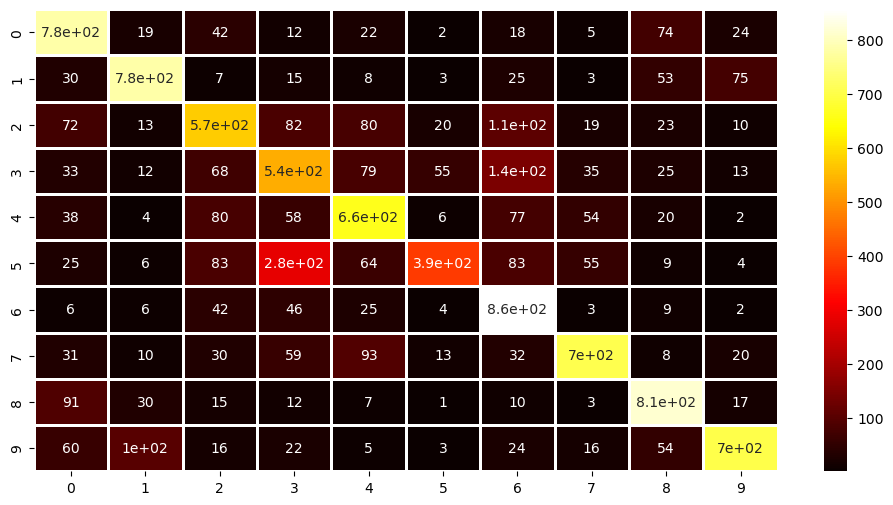

In [51]:
plt.style.use('default')
plt.figure(figsize=(12, 6))
sns.heatmap(confusion_matrix(y_test, prediction), lw =1, annot=True, cmap='hot');

## Prediction new data

In [52]:
new_image = x_test[10]

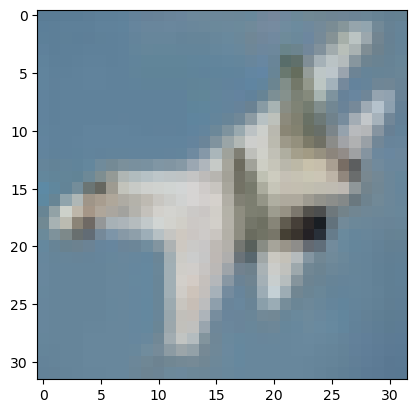

In [54]:
plt.imshow(new_image)

In [56]:
new_predict = np.argmax(model.predict(new_image.reshape(1, 32, 32, 3)), axis =-1)

1/1 [==============================] - 0s 47ms/step


In [57]:
new_predict

array([0], dtype=int64)

In [ ]:
# airplane
# https://www.cs.toronto.edu/~kriz/cifar.html